
# Project 2: Investigate the Medical no-show-up dataset from Kaggel

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report investigates the Medical no-show-up datset from Kaggel. This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The following research questions will be explored

### Research questions
1. What is the overall appointment show-up vs. no show-up rate?
2. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
3. Does it matter how long in advance the appointments are being scheduled for the future no-show share?
4. Does sending an SMS reminder help to reduce the no-shows?


In [18]:
#import important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, the dataset is cleaned, validated and structured for analysis purpose
### General Properties

In [78]:
# Load dataset into a pandas dataframe
df = pd.read_csv('noshowappointments.csv')


### Data Cleaning

In [79]:
# check variables
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [47]:
#check general stats
#The Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program 
#‘ScheduledDay’ tells us on what day the patient set up their appointment
#‘Neighborhood’ indicates the location of the hospital
#‘No show up ’‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up

#age has -1 as min value

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [48]:
#check number non-null values
#There is no null values
#Sheduleday and AppointmentDay data type should be changed ot date
#Scholarship, Hypertension, Diabetes, Alcoholism, SMS_Received to bool data type
# Gender, Neighbourhood, Handicap to categorical data type
#mistypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [49]:
#Confirming there is no null values
pd.isna(df).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [50]:
# checking number of columns and observations
print(df.shape)

(110527, 14)


In [51]:
# check for duplicated rows
df.duplicated().sum()

0

In [52]:
# number of non-null unique values for each feature
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

array([[<Axes: title={'center': 'PatientId'}>,
        <Axes: title={'center': 'AppointmentID'}>,
        <Axes: title={'center': 'ScheduledDay'}>],
       [<Axes: title={'center': 'AppointmentDay'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Scholarship'}>],
       [<Axes: title={'center': 'Hipertension'}>,
        <Axes: title={'center': 'Diabetes'}>,
        <Axes: title={'center': 'Alcoholism'}>],
       [<Axes: title={'center': 'Handcap'}>,
        <Axes: title={'center': 'SMS_received'}>, <Axes: >]], dtype=object)

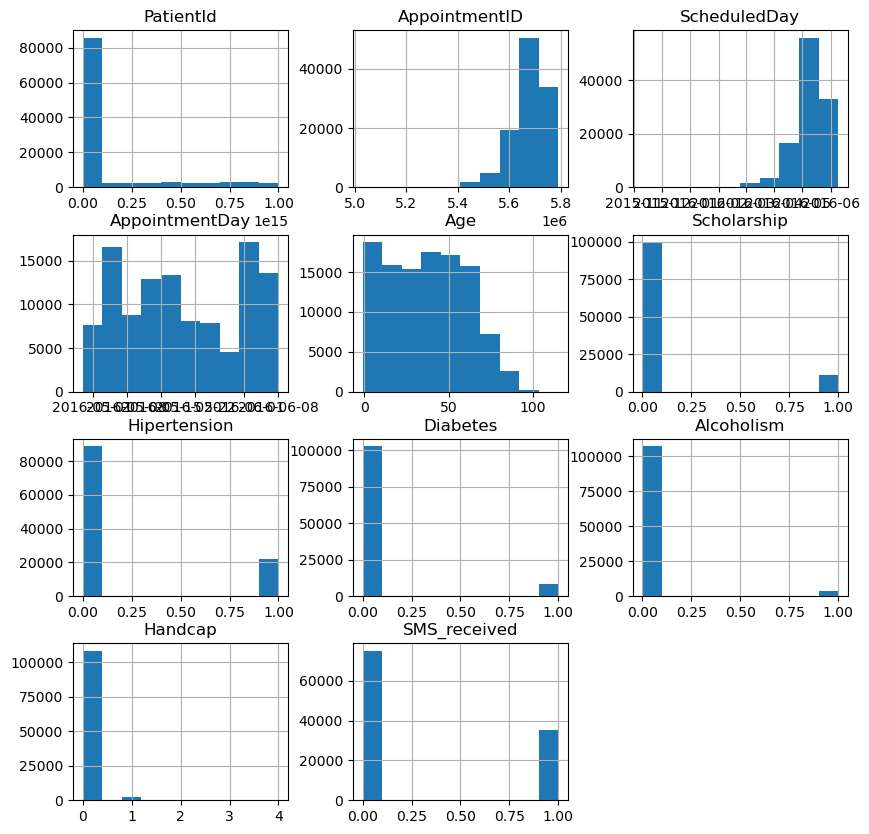

In [54]:
# show summary for all hitograms
df.hist(figsize=(10,10))

In [55]:
#check -1 value for age 
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [56]:
#check whichpatiente has -1 value for age 
df[df['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [57]:
# There are actually just two patients aged 115, which might be plausible
df.groupby(['Age', 'PatientId'])['Age'].count()

Age   PatientId   
-1    4.659432e+14    1
 0    2.699191e+08    2
      3.424788e+08    1
      4.279622e+08    1
      1.192462e+09    1
                     ..
 100  5.578313e+13    1
 102  2.342836e+11    1
      9.762948e+14    1
 115  3.196321e+13    4
      7.482346e+14    1
Name: Age, Length: 63467, dtype: int64

In [80]:
# change Age=-1 to a more realistic Age=0
df['Age'].replace({-1: 0}, inplace=True)

In [81]:
# confirm the change
df['Age'].value_counts()

0      3540
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [105]:
# renaming mistyped columns
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'},\
          inplace=True)

In [106]:
# converting some columns that has date to a datetime datatype
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [107]:
# change Gender, Neighbourhood, Handicap to categorical data type
for c in ['Gender', 'Neighbourhood', 'Handicap']:
    df[c] = df[c].astype('category')

In [110]:
# change Scholarship, Hypertension, Diabetes, Alcoholism, SMSReceived to bool data type
for c in ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMSReceived']:
    df[c] = df[c].astype('bool')

In [112]:
# NoShow column transformation
# No means patient shows up
df['NoShow'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [143]:
# confirm changed data types
df.dtypes

PatientId                     float64
Gender                       category
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                category
Scholarship                      bool
Hypertension                     bool
Diabetes                         bool
Alcoholism                       bool
Handicap                     category
SMSReceived                      bool
NoShow                          int64
dtype: object

In [128]:
# confirm changes
df.head(5)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,0,False,0
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,0,False,0
2,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,0,False,0
3,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,0,False,0
4,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,0,False,0


In [114]:
# check columns summary
df.describe

<bound method NDFrame.describe of            PatientId  AppointmentID Gender              ScheduledDay  \
0       2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1       5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   
2       4.262962e+12        5642549      F 2016-04-29 16:19:04+00:00   
3       8.679512e+11        5642828      F 2016-04-29 17:29:31+00:00   
4       8.841186e+12        5642494      F 2016-04-29 16:07:23+00:00   
...              ...            ...    ...                       ...   
110522  2.572134e+12        5651768      F 2016-05-03 09:15:35+00:00   
110523  3.596266e+12        5650093      F 2016-05-03 07:27:33+00:00   
110524  1.557663e+13        5630692      F 2016-04-27 16:03:52+00:00   
110525  9.213493e+13        5630323      F 2016-04-27 15:09:23+00:00   
110526  3.775115e+14        5629448      F 2016-04-27 13:30:56+00:00   

                  AppointmentDay  Age      Neighbourhood  Scholarship  \
0      2016-04-29 00:00:00+0

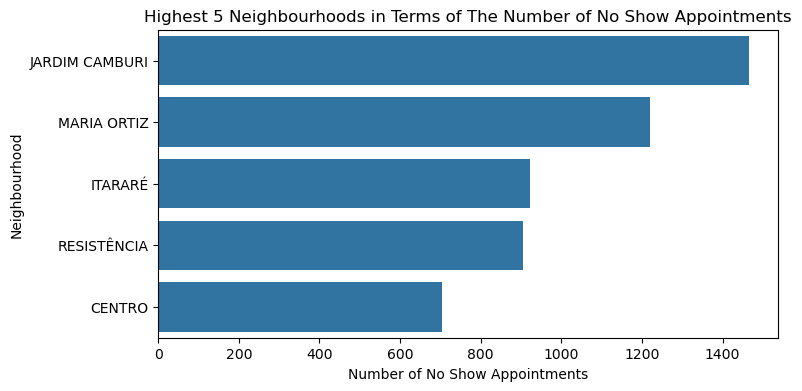

In [161]:
# no show appointments by Neighbourhood
# the highest number of no show up is for the Jardim Camburi hospitla. This is no significant volumne so this variables will be droppped
df_NoShow = df[df.NoShow == 1]

# plot a horizontal bar chart
plt.figure(figsize = [8, 4])
cat_order = df_NoShow['Neighbourhood'].value_counts().index[:5]
sns.countplot(data = df_NoShow, y = 'Neighbourhood', color = base_color, order = cat_order)
plt.title('Highest 5 Neighbourhoods in Terms of The Number of No Show Appointments')
plt.xlabel('Number of No Show Appointments')
plt.ylabel('Neighbourhood');

In [162]:
# dropping AppointmentID column
df.drop(['Neighbourhood'], axis=1, inplace=True)


In [193]:
df['Age'].describe()

count    110527.000000
mean         37.088883
std          23.110190
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [195]:
# bin edges that will be used to "cut" the data into groups
bin_edges = [-1, 18, 37, 55, 115]
# labels for the four age groups
bin_names = ['0-18','19-37','38-55','56 and above']
age_group = pd.cut(df['Age'], bin_edges, labels=bin_names)
# insert a new column (age_group) before column 7
df.insert(7, 'age_group', age_group)
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,age_group,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,DateDiff
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,False,True,56 and above,False,False,0,False,0,-1
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,False,False,56 and above,False,False,0,False,0,-1
2,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,False,False,56 and above,False,False,0,False,0,-1
3,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,False,False,0-18,False,False,0,False,0,-1
4,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,False,True,56 and above,True,False,0,False,0,-1


In [196]:
# confirm changes
df.head(5)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,age_group,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,DateDiff
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,False,True,56 and above,False,False,0,False,0,-1
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,False,False,56 and above,False,False,0,False,0,-1
2,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,False,False,56 and above,False,False,0,False,0,-1
3,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,False,False,0-18,False,False,0,False,0,-1
4,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,False,True,56 and above,True,False,0,False,0,-1


In [197]:
# the highest correlation is for hypertension and age, hypertension and diabetes, and diabetes and age
df.corr().style.background_gradient(cmap='Blues')

C:\Users\gonzalezyj\AppData\Local\Temp\ipykernel_20228\962542900.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='Blues')


,PatientId,Age,Scholarship,Hypertension,Diabetes,Alcoholism,SMSReceived,NoShow,DateDiff
PatientId,1.000000,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.009749,-0.001461,-0.001484
Age,-0.004139,1.000000,-0.092457,0.504586,0.292392,0.095811,0.012643,-0.060319,0.034792
Scholarship,-0.002880,-0.092457,1.000000,-0.019729,-0.024894,0.035022,0.001194,0.029135,-0.029964
Hypertension,-0.006441,0.504586,-0.019729,1.000000,0.433086,0.087971,-0.006267,-0.035701,-0.016336
Diabetes,0.001605,0.292392,-0.024894,0.433086,1.000000,0.018474,-0.014550,-0.015180,-0.026825
Alcoholism,0.011011,0.095811,0.035022,0.087971,0.018474,1.000000,-0.026147,-0.000196,-0.038321
SMSReceived,-0.009749,0.012643,0.001194,-0.006267,-0.014550,-0.026147,1.000000,0.126431,0.397167
NoShow,-0.001461,-0.060319,0.029135,-0.035701,-0.015180,-0.000196,0.126431,1.000000,0.185076
DateDiff,-0.001484,0.034792,-0.029964,-0.016336,-0.026825,-0.038321,0.397167,0.185076,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

This sections covers the computed statistics and  visualizations with the goal of addressing the proposed research questions

### Research Question 1: What is the overall appointment show-up vs. no show-up rate?

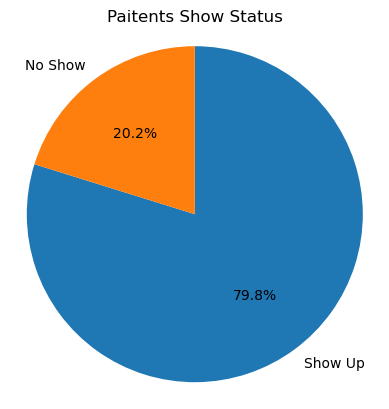

In [115]:
#Around 79% of patients showed to their appointments

sorted_counts = df.NoShow.value_counts()
plt.pie(sorted_counts, labels = ['Show Up', 'No Show'], startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.title('Patients Show Status');

In [116]:
# countplot function usable in subplots
def count_plot(dfdata, xdata, gxlabel, gylabel, gtitle, gcolor=None, gpalette=None):
    g = sns.countplot(data = dfdata, x = xdata, color = gcolor, palette= gpalette)
    plt.title(gtitle)
    plt.xlabel(gxlabel)
    plt.ylabel(gylabel)
    return g


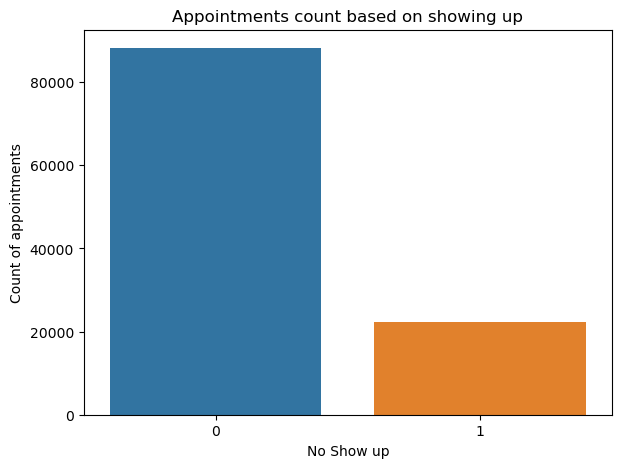

In [117]:
# count of NoShows on all appointments
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
count_plot(df, 'NoShow','No Show up', 'Count of appointments', 'Appointments count based on showing up');

### Research Question 2: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [165]:
# Start the process of assessing the best predictors by analysing gender 
#calculate noshow counts by gender
noshow_by_gender = df.groupby(['Gender', 'NoShow']).count()['Age']
noshow_by_gender

Gender  NoShow
F       0         57246
        1         14594
M       0         30962
        1          7725
Name: Age, dtype: int64

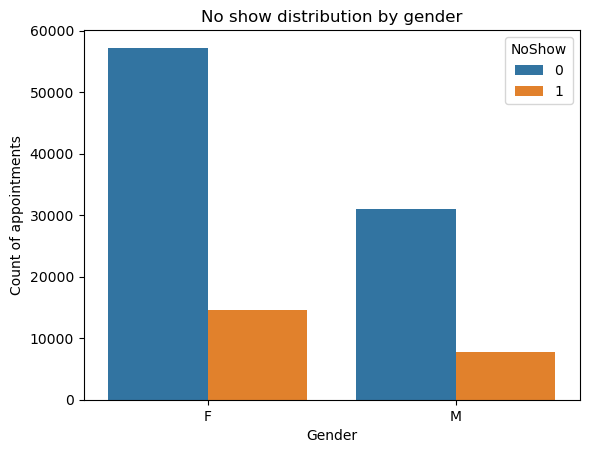

In [166]:
# plotting these counts does not help for distinguishing gender difference in no shows much because 
# there are many more female patients in our data
g = sns.countplot(data = df, x = 'Gender', hue = 'NoShow')
g.set(ylabel = 'Count of appointments', title = 'No show distribution by gender')
plt.show()

In [169]:
# number of appointments by gender
gender_totals = df['Gender'].value_counts()
gender_totals

F    71840
M    38687
Name: Gender, dtype: int64

In [170]:
# calculating frequencies of noshows for females
noshow_proportions_female = noshow_by_gender['F'] / gender_totals['F']
noshow_proportions_female

NoShow
0    0.796854
1    0.203146
Name: Age, dtype: float64

In [171]:
# calculating frequencies of noshows for meales
#seems no show up by gender is similar for both genders. This might not the best predictor for the no show up rates
noshow_proportions_female = noshow_by_gender['M'] / gender_totals['M']
noshow_proportions_female

NoShow
0    0.800321
1    0.199679
Name: Age, dtype: float64

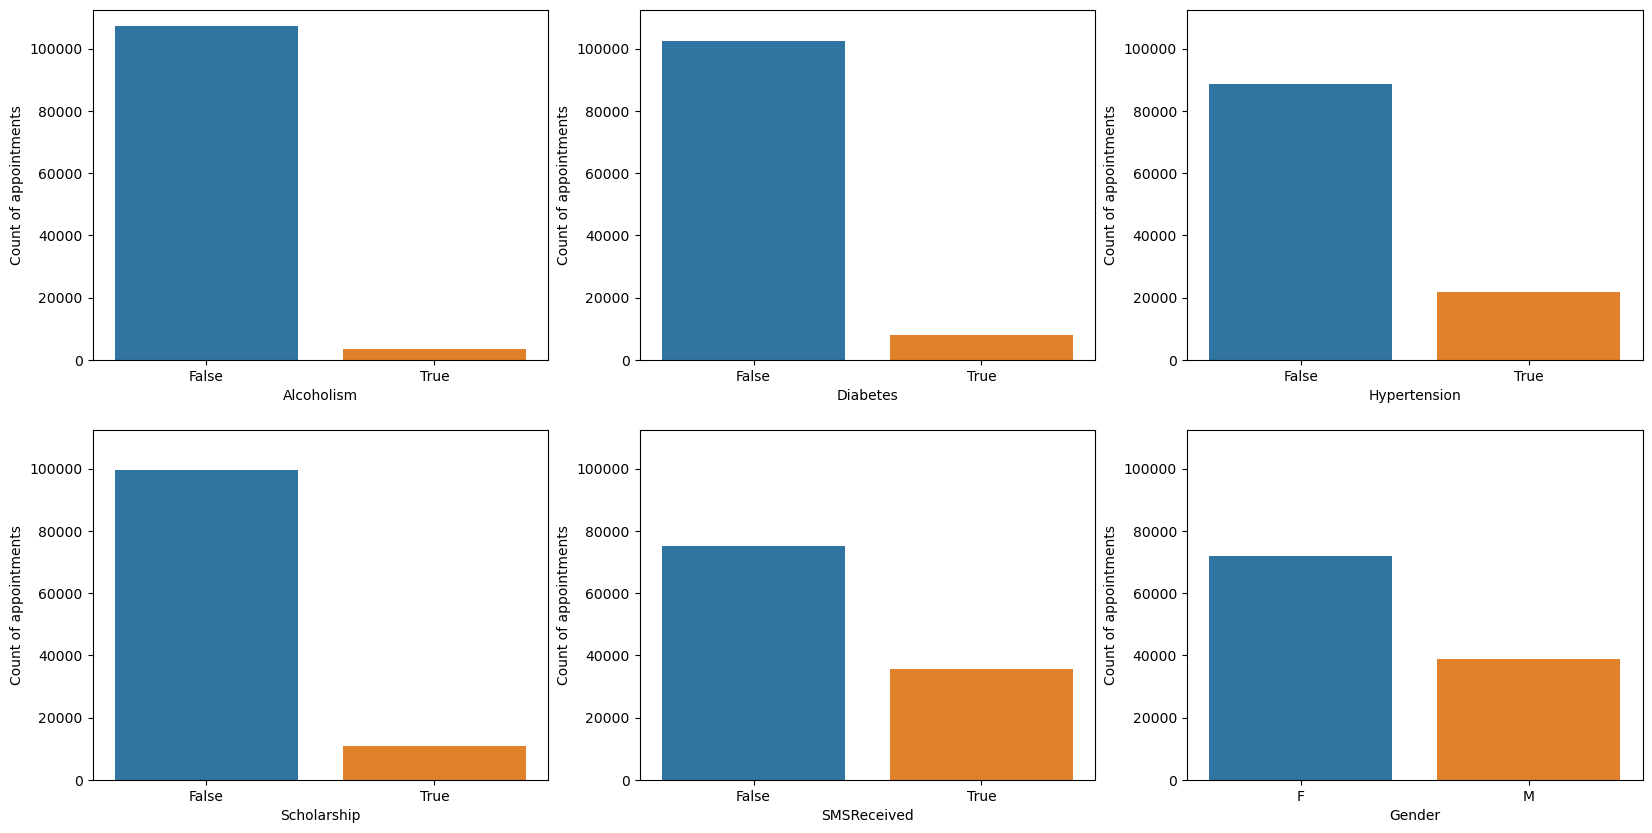

In [144]:
# Next check relationship between noshow ups and the rest of booleans variables
# it seems that Alcoholism and sholarship patients has the highest trend in no shows up
#Hypertension has the lowest trend in no shows up

plt.figure(figsize = [20, 10])

plt.subplot(2, 3, 1)
g1 = count_plot(df, 'Alcoholism', 'Alcoholism', 'Count of appointments', '')

plt.subplot(2, 3, 2)
count_plot(df, 'Diabetes', 'Diabetes', 'Count of appointments', '')
plt.ylim(g1.get_ylim())

plt.subplot(2, 3, 3)
count_plot(df, 'Hypertension', 'Hypertension', 'Count of appointments', '')
plt.ylim(g1.get_ylim())

plt.subplot(2, 3, 4)
count_plot(df, 'Scholarship', 'Scholarship', 'Count of appointments', '')
plt.ylim(g1.get_ylim())

plt.subplot(2, 3, 5)
count_plot(df, 'SMSReceived', 'SMSReceived', 'Count of appointments', '')
plt.ylim(g1.get_ylim())

plt.subplot(2, 3, 6)
count_plot(df, 'Gender', 'Gender', 'Count of appointments', '')
plt.ylim(g1.get_ylim())

plt.show()

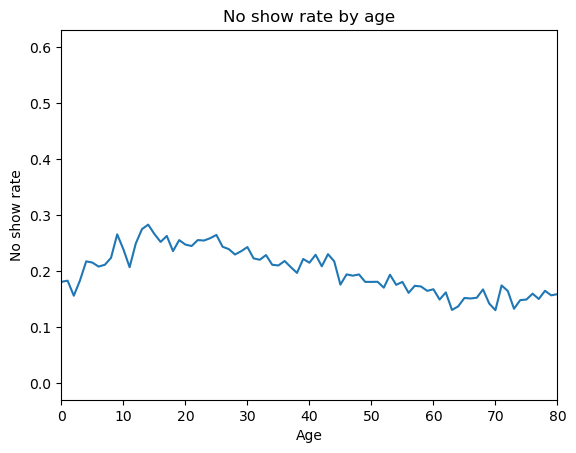

In [180]:
# checking relationhi between age and noshow up
y_means = df['NoShow'].groupby(df['Age']).mean()
x_age = df['Age'].unique()
x_age = sorted(x_age)
plt.errorbar(x = x_age, y = y_means)
plt.title('No show rate by age')
plt.xlabel('Age')
plt.ylabel('No show rate')
plt.xlim(0,80)
plt.show()

### Research Question 3: Does it matter how long in advance the appointments are being scheduled for the future no-show share?

In [132]:
# count number of days between appointment scheduled day and appointment day
datediff = df['AppointmentDay'] - df['ScheduledDay']
datediff = pd.to_timedelta(datediff,'D')
datediff.describe()

count                        110527
mean      9 days 17:08:34.161960425
std      15 days 05:51:27.891504122
min               -7 days +10:10:40
25%        -1 days +15:41:31.500000
50%                 3 days 11:22:18
75%         14 days 07:41:34.500000
max               178 days 13:19:01
dtype: object

In [133]:
# extract just days from the calculated difference
datediff = round(datediff / np.timedelta64(1, 'D')).astype('int')

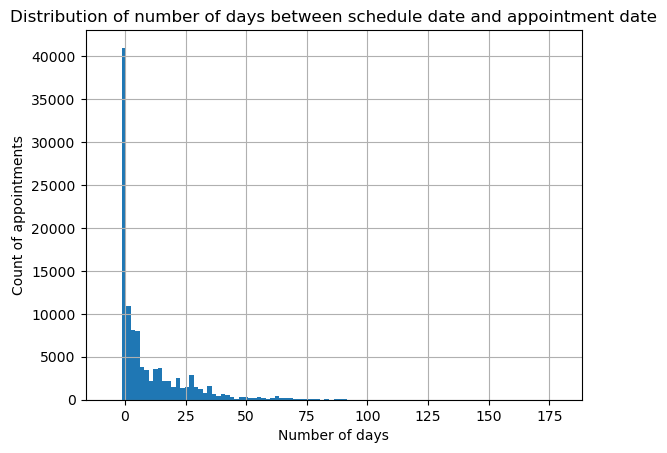

In [134]:
# distribution of date differences - there are many appointments with schedule and appointment at the same day, 
# which means that patients are probably not scheduling in advance
datediff.hist(bins=100)
plt.xlabel('Number of days')
plt.ylabel('Count of appointments')
plt.title('Distribution of number of days between schedule date and appointment date')
plt.show()

In [174]:
# merge datediff to df
df['DateDiff'] = datediff

In [175]:
# confirm changes
df.head(5)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,DateDiff
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,False,True,False,False,0,False,0,-1
1,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,False,False,False,False,0,False,0,-1
2,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,False,False,False,False,0,False,0,-1
3,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,False,False,False,False,0,False,0,-1
4,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,False,True,True,False,0,False,0,-1


In [176]:
# there are 12161 appointments with negative day difference
len(df.query('DateDiff < 0'))

12161

In [177]:
# almost all of these have difference of -1
len(df.query('DateDiff == -1'))

12158

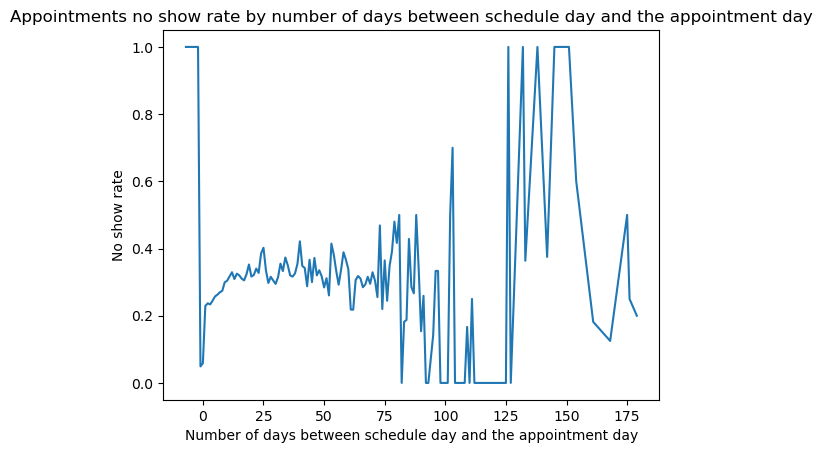

In [178]:
# relationshio between the number of days difference and no shows
y_means = df['NoShow'].groupby(df['DateDiff']).mean()
x_datediff = df['DateDiff'].unique()
x_datediff = sorted(x_datediff)
plt.errorbar(x = x_datediff, y = y_means)
plt.title('Appointments no show rate by day differences')
plt.xlabel('Date difference')
plt.ylabel('No show rate')
plt.show()

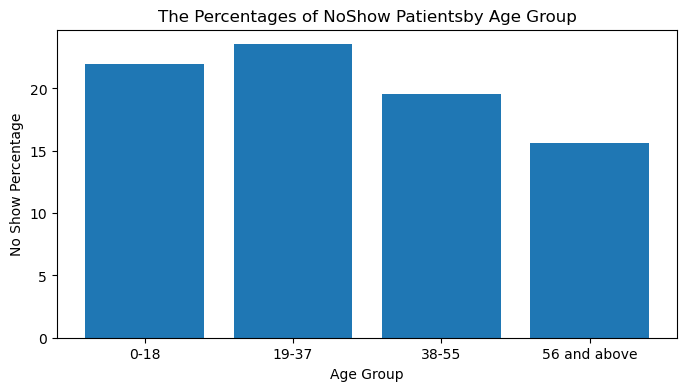

In [201]:
# percentages of no show patients based on age group
no_show_perc_age = df.groupby('age_group').NoShow.mean() * 100

# plot a bar chart
plt.figure(figsize = [8, 4])
plt.bar(x = no_show_perc_age.index, height = no_show_perc_age)
plt.title('The Percentages of NoShow Patientsby Age Group')
plt.xlabel('Age Group')
plt.ylabel('No Show Percentage');

### Research Question 4: Does sending an SMS reminder help to reduce the no-shows?

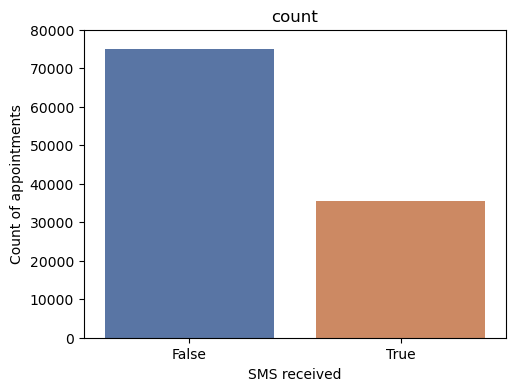

In [183]:
# checking sms

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
g1 = count_plot(df, 'SMSReceived', 'SMS received', 'Count of appointments', 'count', \
                None, 'deep')
g1.set(ylim=(0, 80000))


plt.show()

In [203]:
# 35482 appointments received an SMS
SMS = df['SMSReceived'].value_counts()
SMS

False    75045
True     35482
Name: SMSReceived, dtype: int64

In [215]:
def plot_details(plot):
    plot.set(ylim=(0,0.3))
    plot.axhline(noshow_proportion, color='black')
    plt.ylim(g1.get_ylim())



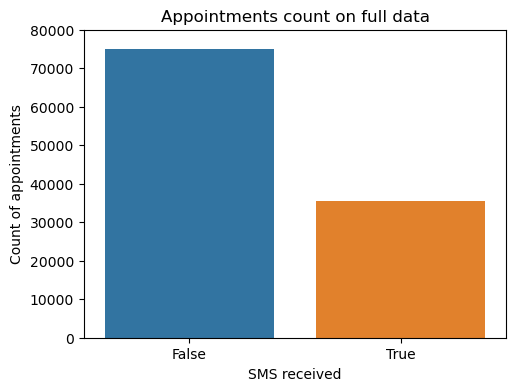

In [217]:
plt.figure(figsize = (12, 4))



plt.subplot(1, 2, 2)
g2 = count_plot(df, 'SMSReceived', 'SMS received', 'Count of appointments', 'Appointments count on full data')
plt.ylim(g1.get_ylim())

plt.show()

<a id='conclusions'></a>
## Conclusions

The most siginificant factors to predict the schedule appoinments are scholarship, type of patient (medical condition) and age. Main findings as follows:

- Patient with a scholarship is more likely to not show up for the appointment
- The younger the patient is the more likely they are going to miss the appointment
- The patients who did not receive SMS regarding their appointment have higher number of patients showing up for their appointment
- Appointments of males and females have very similar no show rates
- Alcoholics are skipped more frequently than the average shown for other patients 
- Most of patients scheduled their appointments on the same day

Following the answers to research questions:

1. What is the overall appointment show-up vs. no show-up rate?

The proportion of patients show-up appointment is 79.8% and no showe appointment is 20.2% . Total attended appointments is substantially greater than the number of appointments that patients did not show-up for

2. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

Based on the descriptive analysis, Scholarship, type of patient (medical condition) and age. Patients with sholarships, hypertense and age 0 to 37 have the higher rates of no show ups.

3. Does it matter how long in advance the appointments are being scheduled for the future no-show share?

Yes, there is an increasing trend of no show rate as the day difference between schedule and appointment day gets larger

4. Does sending an SMS reminder help to reduce the no-shows?

Yes, sending an SMS seems to be somewhat helpful in reducing no shows, but the correlation is very small

### Limitation:

- Conclusions are based on the exploratory data analysis. Inferencial analysis has not been applied so this findingss are - tentative
- Dataset inconsietncy suach as age 0 or less
- More variables like appointment such as employment status and type of medical appoinment would habe been beneficial
- More data across years would have been beneficial
- There was a patient age -1. This mistake was corrected by substituying the age -1 to 0